**Applying the SIR model to model spread of COVID-19 in Nepal**

**Basics for SIR Model**

S (Susceptible): Individuals who can be 'infected' by corruption.

I (Infectious): Individuals who are actively engaging in corrupt practices and can 'infect' others.

R (Recovered): Individuals who were previously 'infected' but have ceased to engage in corruption.

**Summary**

In this research, the primary objective was to examine the dynamics of COVID-19 transmission in Nepal using the SIR (Susceptible, Infected, Recovered) model. SIR is a classical mathematical framework employed in epidemiology to predict the spread of infectious diseases. The study analyzed COVID-19 case data specific to Nepal by utilizing data manipulation techniques through a python library named Pandas.

The SIR model segments the population into three distinct groups: those susceptible to the infection (S), those currently infected (I), and those who have recovered (R). The transitions between these states are given by a set of differential equations:

\begin{align*}
\frac{dS}{dt} & = -\beta \frac{SI}{N}, \\
\frac{dI}{dt} & = \beta \frac{SI}{N} - \gamma I, \\
\frac{dR}{dt} & = \gamma I,
\end{align*}

where β represents the rate at which the infection spreads from infected to susceptible individuals, γ denotes the recovery rate, and N is the total population.

The study utilized the odeint function from the SciPy library to solve the SIR model's differential equations and simulate the disease's progression over time.

**Importing data to filter and analyze <br>
Source of Data: https://github.com/datasets/covid-19**

In [1]:
#Importing the data
import pandas as pd
df = pd.read_csv('/Users/rupakraut/Desktop/coronavirus.csv', low_memory=False)

In [2]:
#Analyzing the fields of the data
df.head()

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
0,2020-01-22,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
1,2020-01-23,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
2,2020-01-24,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
3,2020-01-25,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN
4,2020-01-26,Alberta,Canada,53.9333,-116.5765,confirmed,0,12401.0,CA,CAN,124.0,"Alberta, Canada",4413146.0,North America,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919308 entries, 0 to 919307
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            919308 non-null  object 
 1   province        277303 non-null  object 
 2   country         919308 non-null  object 
 3   lat             913913 non-null  float64
 4   long            913913 non-null  float64
 5   type            919308 non-null  object 
 6   cases           919308 non-null  int64  
 7   uid             884780 non-null  float64
 8   iso2            871832 non-null  object 
 9   iso3            875069 non-null  object 
 10  code3           875069 non-null  float64
 11  combined_key    884780 non-null  object 
 12  population      867516 non-null  float64
 13  continent_name  875069 non-null  object 
 14  continent_code  718614 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 105.2+ MB


**Filtering out the data to include data for Nepal**

In [4]:
#Filtering data
nepal_data = df[df['country'] == 'Nepal']

In [5]:
nepal_data.head()

,date,province,country,lat,long,type,cases,uid,iso2,iso3,code3,combined_key,population,continent_name,continent_code
231985,2020-01-22,NaN,Nepal,28.1667,84.25,confirmed,0,524.0,NP,NPL,524.0,Nepal,29136808.0,Asia,AS
231986,2020-01-23,NaN,Nepal,28.1667,84.25,confirmed,0,524.0,NP,NPL,524.0,Nepal,29136808.0,Asia,AS
231987,2020-01-24,NaN,Nepal,28.1667,84.25,confirmed,0,524.0,NP,NPL,524.0,Nepal,29136808.0,Asia,AS
231988,2020-01-25,NaN,Nepal,28.1667,84.25,confirmed,1,524.0,NP,NPL,524.0,Nepal,29136808.0,Asia,AS
231989,2020-01-26,NaN,Nepal,28.1667,84.25,confirmed,0,524.0,NP,NPL,524.0,Nepal,29136808.0,Asia,AS



**Filter the DataFrame to include only rows where 'type' equals 'recovery', 'confirmed' and 'deaths'**

In [6]:
nepal_recovery = nepal_data[nepal_data['type'] == 'recovery']
nepal_confirmed = nepal_data[nepal_data['type'] == 'confirmed']
nepal_deaths = nepal_data[nepal_data['type'] == 'death']

In [7]:
nepal_deaths.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 543816 to 544894
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1079 non-null   object 
 1   province        0 non-null      object 
 2   country         1079 non-null   object 
 3   lat             1079 non-null   float64
 4   long            1079 non-null   float64
 5   type            1079 non-null   object 
 6   cases           1079 non-null   int64  
 7   uid             1079 non-null   float64
 8   iso2            1079 non-null   object 
 9   iso3            1079 non-null   object 
 10  code3           1079 non-null   float64
 11  combined_key    1079 non-null   object 
 12  population      1079 non-null   float64
 13  continent_name  1079 non-null   object 
 14  continent_code  1079 non-null   object 
dtypes: float64(5), int64(1), object(9)
memory usage: 134.9+ KB


**Cleaning the data to only include the column cases and setting the index to date**

In [8]:
nepal_recovery_clean = nepal_recovery[['date', 'cases']].copy()
nepal_recovery_clean.set_index('date', inplace=True)

nepal_deaths_clean = nepal_deaths[['date', 'cases']].copy()
nepal_deaths_clean.set_index('date', inplace=True)

nepal_confirmed_clean = nepal_confirmed[['date', 'cases']].copy()
nepal_confirmed_clean.set_index('date', inplace=True)

In [9]:
nepal_deaths_clean.head()

,cases
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


**Renaming the column "cases" so as to avoid confusion later while merging recovery, deaths, and confirmed data**

In [10]:
#renaming the cases
nepal_recovery_clean.rename(columns={'cases': 'recovered_cases'}, inplace=True)
nepal_deaths_clean.rename(columns={'cases': 'death_cases'}, inplace=True)
nepal_confirmed_clean.rename(columns={'cases': 'confirmed_cases'}, inplace=True)

**Merging the dataframes while keeping date column**

In [11]:
#merging the dataframes
nepal_combined = nepal_recovery_clean.merge(nepal_deaths_clean, on='date', how='outer')
nepal_combined = nepal_combined.merge(nepal_confirmed_clean, on='date', how='outer')
nepal_combined.sort_index(inplace = True)

**Since the cases of each day are corresponding to the cases of that particular day rather than the cumulative sum till that day. We use cumsum() to calculate the cumulative sum**

In [12]:
#cumsum of the data
nepal_combined['recovered_cases'] = nepal_combined['recovered_cases'].cumsum()
nepal_combined['death_cases'] = nepal_combined['death_cases'].cumsum()
nepal_combined['confirmed_cases'] = nepal_combined['confirmed_cases'].cumsum()

In [13]:
nepal_combined[560:]

,recovered_cases,death_cases,confirmed_cases
date,,,
2021-08-04,661651,9957,705072
2021-08-05,0,9994,708079
2021-08-06,0,10019,710509
2021-08-07,0,10038,712740
2021-08-08,0,10093,714877
...,...,...,...
2022-12-31,0,12019,1001000
2023-01-01,0,12019,1001002
2023-01-02,0,12019,1001003


**Upon further inspection of the data, it seems that the source lacks the data of recovered_cases from 2021-08-05, so I decided to drop the dates with missing recovered_cases to ensure efficient data**

In [14]:
nepal_combined.index = pd.to_datetime(nepal_combined.index)
nepal_combined = nepal_combined[nepal_combined.index <= '2021-08-04']

In [15]:
nepal_combined

,recovered_cases,death_cases,confirmed_cases
date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,1
2020-01-26,0,0,1
...,...,...,...
2021-07-31,654177,9857,695389
2021-08-01,656197,9875,697370
2021-08-02,658122,9898,699649


**Now the data is cleaned and filtered enough to start calculating the susceptible and infectious population for the SIR model.**

Formulae for calculating the susceptible and infectious population

$$S = N - C$$ 
$$I = C - R - D$$

where N is the total population, S is the susceptible population, C is the confirmed cases, R is the recovered cases, and D is the deaths

In [16]:
# Total population
nepal_population = 29164578

# Calculate the susceptible population
nepal_combined['susceptible'] = nepal_population - nepal_combined['confirmed_cases']

In [17]:
# Calculate the number of infectious individuals
nepal_combined['infectious'] = nepal_combined['confirmed_cases'] - nepal_combined['recovered_cases'] - nepal_combined['death_cases']
nepal_combined

,recovered_cases,death_cases,confirmed_cases,susceptible,infectious
date,,,,,
2020-01-22,0,0,0,29164578,0
2020-01-23,0,0,0,29164578,0
2020-01-24,0,0,0,29164578,0
2020-01-25,0,0,1,29164577,1
2020-01-26,0,0,1,29164577,1
...,...,...,...,...,...
2021-07-31,654177,9857,695389,28469189,31355
2021-08-01,656197,9875,697370,28467208,31298
2021-08-02,658122,9898,699649,28464929,31629


**The required data is ready. So we go on to calculate the transmission rate (beta), and the recovery rate (gamma)**

The transmission rate is given by:
$$β = RO * γ$$

where RO is the basic reproductive rate of Covid-19 which is specific to specific regions and γ is the recovery rate.

The recovery rate is further given by:

$$
\gamma = \frac{1}{p}
$$

where $p$ is the average infectious period of covid-19

In [18]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8233407/ 
#basic reproductive rate
RO = 1.4


#average infectious period of covid-19
avg_day = 10.0

#recovery rate
gamma = 1/avg_day

In [19]:
#transmission rate
beta = RO * gamma

In [20]:
# Define the SIR model differential equations.
def sir_model(y, t, N, beta, gamma): #in this case t is an independent variable
    S, I, R = y #S --> susceptible population, I-->infectious population, R--> recovered population
    dSdt = -beta * S * I / N #change in susceptible over time
    dIdt = beta * S * I / N - gamma * I #change in infected over time
    dRdt = gamma * I #change in recovered over time
    return dSdt, dIdt, dRdt

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Total population, N.
N = 29164578

# Initial number of infected(I0) and recovered individuals(R0).
I0 = 1
R0 = 0
S0 = 29164577  #Initial number of susceptible individuals (N - I0).

# A grid of time points for 100 days
t = np.linspace(0, 100, 100) 

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid, t.
ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

***The odeint function will integrate the system over t and provide the solution at each of these points.***

In [22]:
# Integrate the SIR equations over the time grid, t.
ret = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

***Plot the data using three separate curves for S(t), I(t), and R(t) in three different plots since the magnitude of each curves varies by a significant amount***

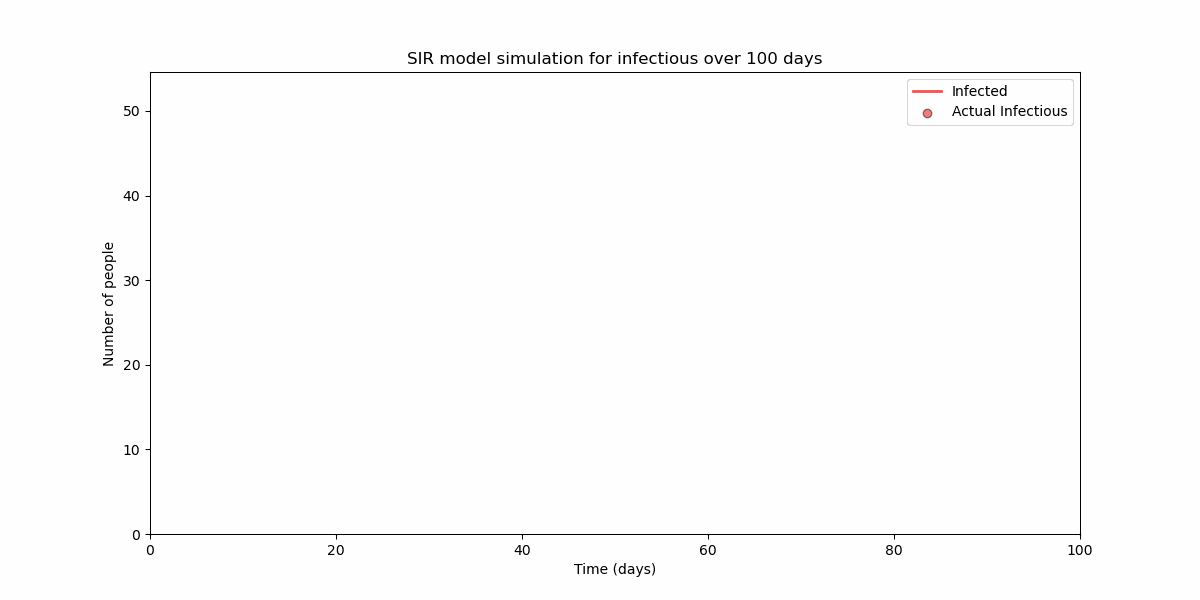

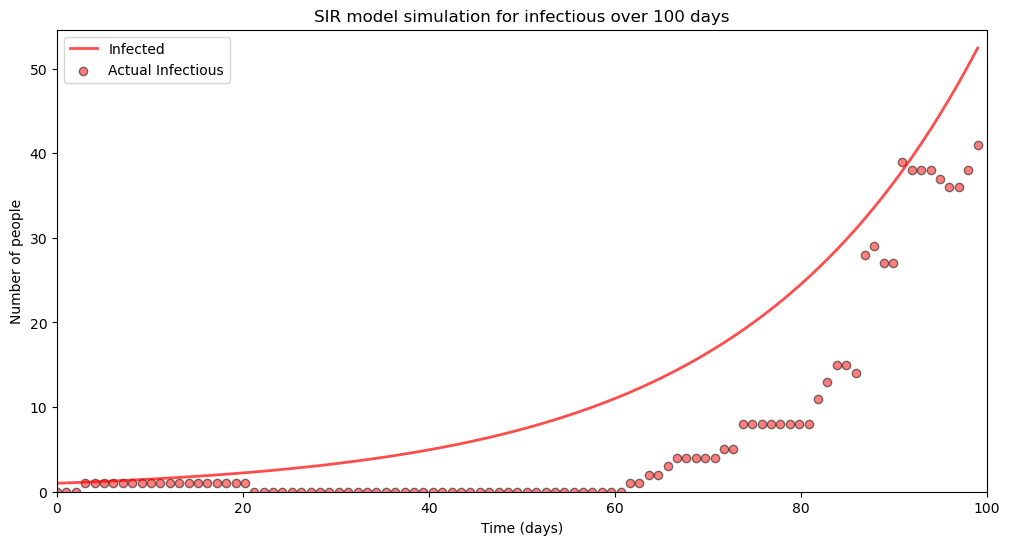

In [23]:
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize a line plot and scatter plot
line, = ax.plot([], [], 'r', alpha=0.7, linewidth=2, label='Infected')
scatter = ax.scatter([], [], c='red', label='Actual Infectious', alpha=0.5, edgecolor='k')

# Setting the labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of people')
ax.set_title('SIR model simulation for infectious over 100 days')
ax.legend()

# Setting the limits
ax.set_xlim(0, max(t))
ax.set_ylim(0, max(max(I), max(nepal_combined['infectious'][:100])))

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    scatter.set_offsets(np.empty((0, 2)))
    return line, scatter

# Animation function
def animate(i):
    x = t[:i]
    y = I[:i]
    line.set_data(x, y)
    scatter.set_offsets(np.column_stack([t[:i], nepal_combined['infectious'][:i]]))
    return line, scatter

# Call the animator
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=100, blit=True)

# Save the animation
anim.save('infectious_model_simulation.gif', writer='pillow')

Image(filename='infectious_model_simulation.gif')

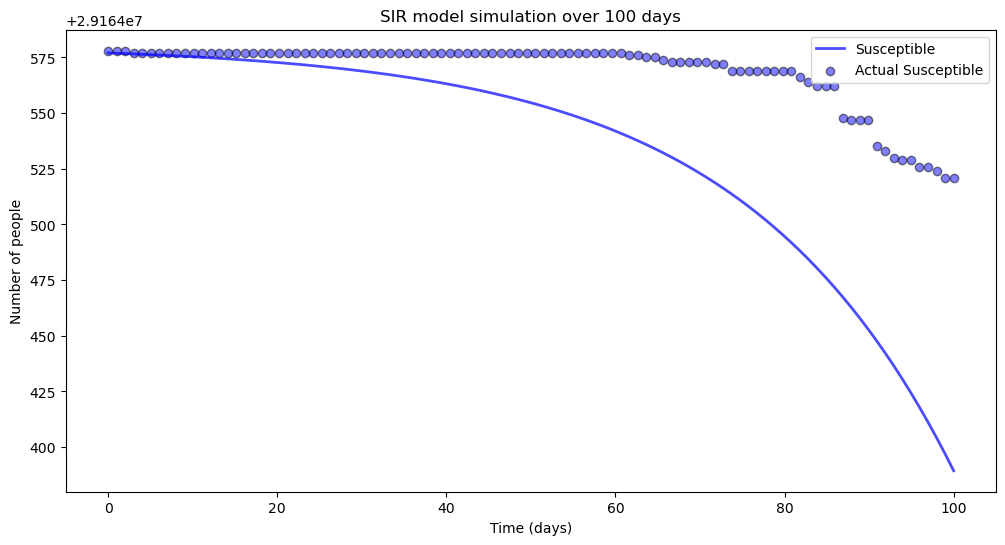

In [24]:
# Setup the figure and axis
plt.figure(figsize=(12, 6))

# Initialize a line plot for predicted values and scatter plot for actual values
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.scatter(t, nepal_combined['susceptible'][:100], c='blue', label='Actual Susceptible', alpha=0.5, edgecolor='k')

# Setting the labels and title
plt.xlabel('Time (days)')
plt.ylabel('Number of people')
plt.title('SIR model simulation over 100 days')
plt.legend()
plt.show()

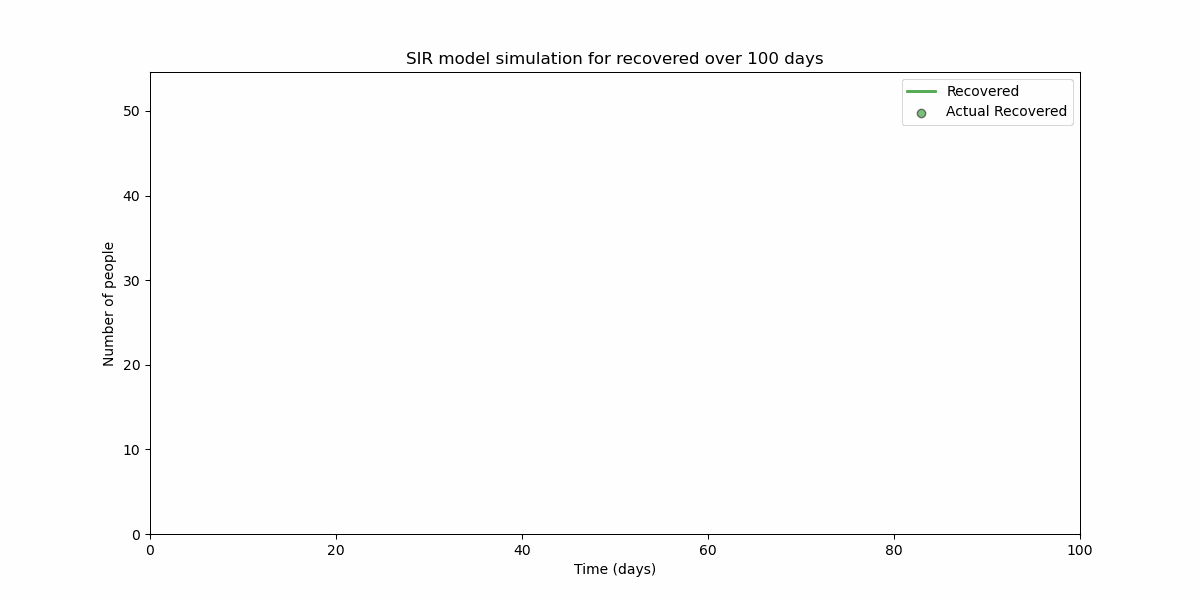

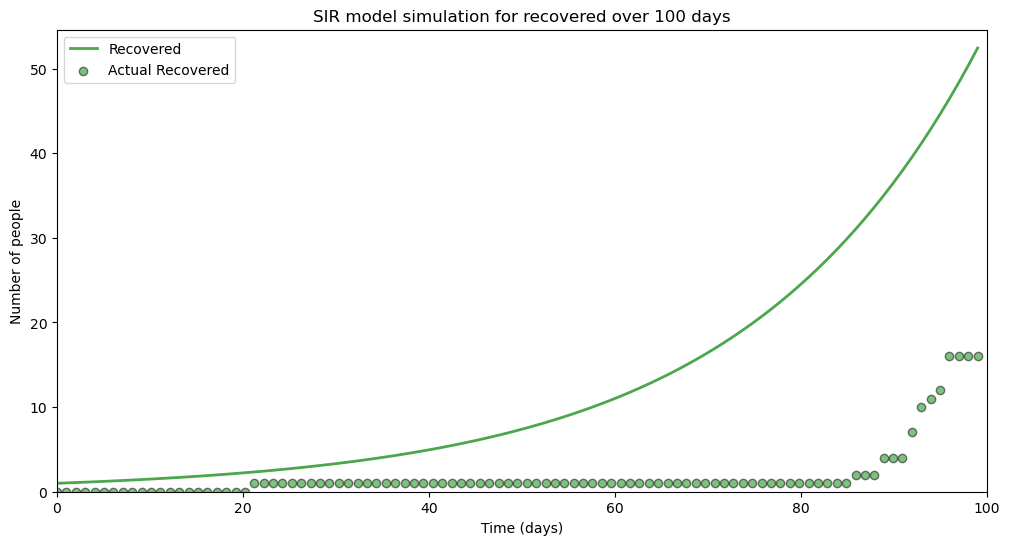

In [25]:
from matplotlib.animation import FuncAnimation
from IPython.display import Image

# Setup the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Initialize a line plot for predicted values and scatter plot for actual values
line, = ax.plot([], [], 'g', alpha=0.7, linewidth=2, label='Recovered')
scatter = ax.scatter([], [], c='green', label='Actual Recovered', alpha=0.5, edgecolor='k')

# Setting the labels and title
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of people')
ax.set_title('SIR model simulation for recovered over 100 days')
ax.legend()

# Setting the limits
ax.set_xlim(0, max(t))
ax.set_ylim(0, max(max(I), max(nepal_combined['recovered_cases'][:100])))

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    scatter.set_offsets(np.empty((0, 2)))
    return line, scatter

# Animation function
def animate(i):
    x = t[:i]
    y = I[:i]
    line.set_data(x, y)
    scatter.set_offsets(np.column_stack([t[:i], nepal_combined['recovered_cases'][:i]]))
    return line, scatter

# Call the animator
anim = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=100, blit=True)

# Save the animation
anim.save('recovered_model_simulation.gif', writer='pillow')

Image(filename='recovered_model_simulation.gif')